# Generate advanced model insights

This notebook explores model insights available for DataRobot's Python client. You can download this notebook using the icon in the top right of the page. Download the dataset used in this notebook [here](10k_diabetes.csv).

## Setup

### Import libraries

Import the libraries in the following snippet. Some of these will assist with the presentation of model insights.

In [1]:
%matplotlib inline
import datarobot as dr
from datarobot.enums import AUTOPILOT_MODE
from datarobot.errors import ClientError
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

### Configure DataRobot API authentication

Read more about different options for [connecting to DataRobot API from the client](https://docs.datarobot.com/en/docs/api/api-quickstart/api-qs.html).

In [ ]:
# If the config file is not in the default location described in the API Quickstart guide, '~/.config/datarobot/drconfig.yaml', then you will need to call
# dr.Client(config_path='path-to-drconfig.yaml')

### Import data

In [3]:
data_path = "10k_diabetes.csv"

df = pd.read_csv(data_path)
df.head()

race  gender      age   weight admission_type_id  \
0        Caucasian  Female  [50-60)        ?          Elective   
1        Caucasian  Female  [20-30)  [50-75)            Urgent   
2        Caucasian    Male  [80-90)        ?     Not Available   
3  AfricanAmerican  Female  [50-60)        ?         Emergency   
4  AfricanAmerican  Female  [50-60)        ?         Emergency   

                            discharge_disposition_id  \
0                                 Discharged to home   
1                                 Discharged to home   
2  Discharged/transferred to home with home healt...   
3                                 Discharged to home   
4                                 Discharged to home   

                          admission_source_id  time_in_hospital payer_code  \
0                          Physician Referral                 1         CP   
1                          Physician Referral                 2         UN   
2                                         NaN                 7         MC   
3  Transfer from another health care facility                 4         UN   
4                              Emergency Room                 5          ?   

        medical_specialty  ...  glipizide_metformin  glimepiride_pioglitazone  \
0           Surgery-Neuro  ...                   No                        No   
1                       ?  ...                   No                        No   
2  Family/GeneralPractice  ...                   No                        No   
3                       ?  ...                   No                        No   
4              Psychiatry  ...                   No                        No   

   metformin_rosiglitazone  metformin_pioglitazone  change  diabetesMed  \
0                       No                      No      No           No   
1                       No                      No      No           No   
2                       No                      No      No          Yes   
3                       No                      No      No          Yes   
4                       No                      No      Ch          Yes   

  readmitted                                        diag_1_desc  \
0      False                 Spinal stenosis in cervical region   
1      False  First-degree perineal laceration, unspecified ...   
2       True  Pneumococcal pneumonia [Streptococcus pneumoni...   
3      False                     Cellulitis and abscess of face   
4      False  Bipolar I disorder, single manic episode, unsp...   

                                         diag_2_desc  \
0                 Spinal stenosis in cervical region   
1  Diabetes mellitus of mother, complicating preg...   
2              Congestive heart failure, unspecified   
3  Streptococcus infection in conditions classifi...   
4  Diabetes mellitus without mention of complicat...   

                                         diag_3_desc  
0                Effusion of joint, site unspecified  
1                               Sideroblastic anemia  
2               Hyperosmolality and/or hypernatremia  
3  Diabetes mellitus without mention of complicat...  
4                          Depressive type psychosis  

[5 rows x 51 columns]

## Modeling

### Create a project

Create a new project using the `10K_diabetes.csv` dataset, containing the target `readmitted` (framed as a binary classification problem).

In [4]:
project = dr.Project.create(data_path, project_name="10K Diabetes Adv Modeling")
print("Project ID: {}".format(project.id))

Project ID: 635c2f3ba5c95929466f3cb7


### Start Autopilot

In [6]:
project.analyze_and_model(
    target="readmitted",
    worker_count=-1,
)

Project(10K Diabetes Adv Modeling)

In [6]:
project.wait_for_autopilot()

In progress: 14, queued: 0 (waited: 0s)
In progress: 14, queued: 0 (waited: 1s)
In progress: 14, queued: 0 (waited: 1s)
In progress: 14, queued: 0 (waited: 2s)
In progress: 14, queued: 0 (waited: 3s)
In progress: 14, queued: 0 (waited: 5s)
In progress: 11, queued: 0 (waited: 9s)
In progress: 10, queued: 0 (waited: 16s)
In progress: 6, queued: 0 (waited: 29s)
In progress: 1, queued: 0 (waited: 49s)
In progress: 7, queued: 0 (waited: 70s)
In progress: 1, queued: 0 (waited: 90s)
In progress: 16, queued: 0 (waited: 111s)
In progress: 10, queued: 0 (waited: 131s)
In progress: 6, queued: 0 (waited: 151s)
In progress: 2, queued: 0 (waited: 172s)
In progress: 0, queued: 0 (waited: 192s)
In progress: 5, queued: 0 (waited: 213s)
In progress: 1, queued: 0 (waited: 233s)
In progress: 4, queued: 0 (waited: 253s)
In progress: 1, queued: 0 (waited: 274s)
In progress: 1, queued: 0 (waited: 294s)
In progress: 0, queued: 0 (waited: 315s)
In progress: 0, queued: 0 (waited: 335s)


### Get the top-performing model

In [8]:
model = project.get_top_model()

## Model insights

The following sections outline the various model insights DataRobot has to offer. Before proceeding, set color constants to replicate the visual style of DataRobot.

In [9]:
dr_dark_blue = "#08233F"
dr_blue = "#1F77B4"
dr_orange = "#FF7F0E"
dr_red = "#BE3C28"

### Feature Impact

[Feature Impact](https://docs.datarobot.com/en/docs/modeling/analyze-models/understand/feature-impact.html) measures how important a feature is in the context of a model. It measures how much the accuracy of a model would decrease if that feature was removed.

Feature Impact is available for all model types and works by altering input data and observing the effect on a model’s score. It is an on-demand feature, meaning that you must initiate a calculation to see the results. Once DataRobot computes the feature impact for a model, that information is saved with the project.

In [10]:
feature_impacts = model.get_or_request_feature_impact()

Text(0.5, 1.04, 'Feature Impact')

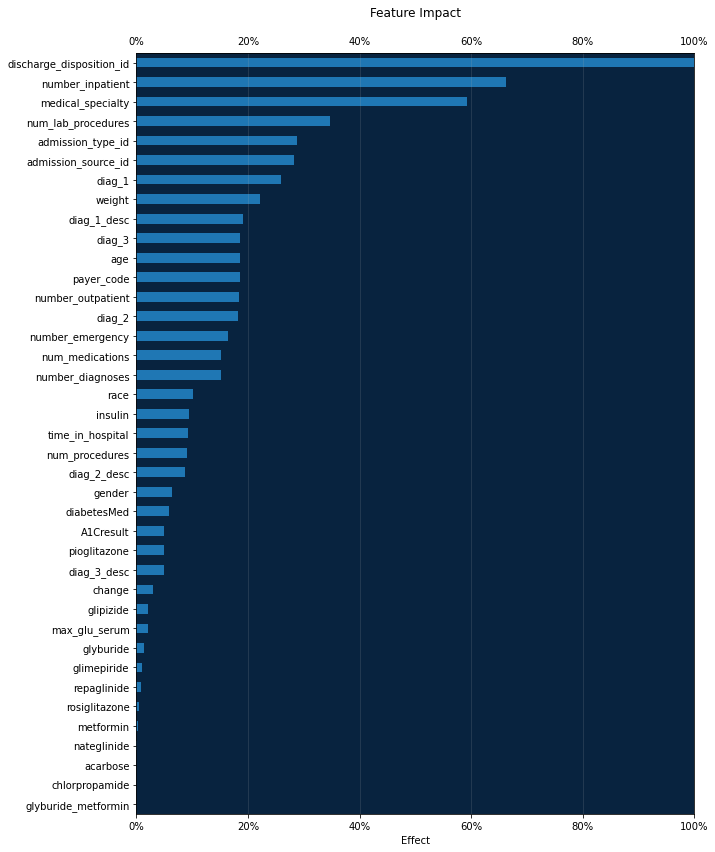

In [11]:
# Formats the ticks from a float into a percent
percent_tick_fmt = mtick.PercentFormatter(xmax=1.0)

impact_df = pd.DataFrame(feature_impacts)
impact_df.sort_values(by="impactNormalized", ascending=True, inplace=True)

# Positive values are blue, negative are red
bar_colors = impact_df.impactNormalized.apply(lambda x: dr_red if x < 0 else dr_blue)

ax = impact_df.plot.barh(
    x="featureName", y="impactNormalized", legend=False, color=bar_colors, figsize=(10, 14)
)
ax.xaxis.set_major_formatter(percent_tick_fmt)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.grid(True, alpha=0.2)
ax.set_facecolor(dr_dark_blue)

plt.ylabel("")
plt.xlabel("Effect")
plt.xlim((None, 1))  # Allow for negative impact
plt.title("Feature Impact", y=1.04)

### Histogram

The [histogram](https://docs.datarobot.com/en/docs/data/analyze-data/histogram.html#histogram-chart) chart "buckets" numeric feature values into equal-sized ranges to show frequency distribution of the variable—the target observation (Y-axis) plotted against the frequency of the value (X-axis). The height of each bar represents the number of rows with values in that range.

The helper function below, `matplotlib_pair_histogram`, is used to draw histograms paired with the project's target feature (`readamitted` in this case). The function includes an orange line in every histogram bin that indicates the average target feature value for rows in that bin.

In [19]:
def matplotlib_pair_histogram(labels, counts, target_avgs, bin_count, ax1, feature):
    # Rotate categorical labels
    if feature.feature_type in ["Categorical", "Text"]:
        ax1.tick_params(axis="x", rotation=45)
    ax1.set_ylabel(feature.name, color=dr_blue)
    ax1.bar(labels, counts, color=dr_blue)
    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(target_feature_name, color=dr_orange)
    ax2.plot(labels, target_avgs, marker="o", lw=1, color=dr_orange)
    ax1.set_facecolor(dr_dark_blue)
    title = "Histogram for {} ({} bins)".format(feature.name, bin_count)
    ax1.set_title(title)

The next function, `draw_feature_histogram`, gets the histogram data and draws the histogram using the previous helper function. 

Before using the function, you can retrieve downsampled histogram data using the snippet below:

In [13]:
feature = dr.Feature.get(project.id, "num_lab_procedures")
feature.get_histogram(bin_limit=6).plot

[{'label': '1.0', 'count': 755, 'target': 0.36026490066225164},
 {'label': '14.5', 'count': 895, 'target': 0.3240223463687151},
 {'label': '28.0', 'count': 1875, 'target': 0.3744},
 {'label': '41.5', 'count': 2159, 'target': 0.38490041685965726},
 {'label': '55.0', 'count': 1603, 'target': 0.45414847161572053},
 {'label': '68.5', 'count': 557, 'target': 0.5080789946140036}]

For best accuracy, DataRobot recommends using divisors of 60 for `bin_limit`. Any value less than or equal to 60 can be used.

The `target` values are project target input average values for a given bin.

In [20]:
def draw_feature_histogram(feature_name, bin_count):
    feature = dr.Feature.get(project.id, feature_name)
    # Retrieve downsampled histogram data from server
    # based on desired bin count
    data = feature.get_histogram(bin_count).plot
    labels = [row["label"] for row in data]
    counts = [row["count"] for row in data]
    target_averages = [row["target"] for row in data]
    f, axarr = plt.subplots()
    f.set_size_inches((10, 4))
    matplotlib_pair_histogram(labels, counts, target_averages, bin_count, axarr, feature)

Lastly, specify the feature name, target, and desired bin count to create the feature histograms. You can view an example below:

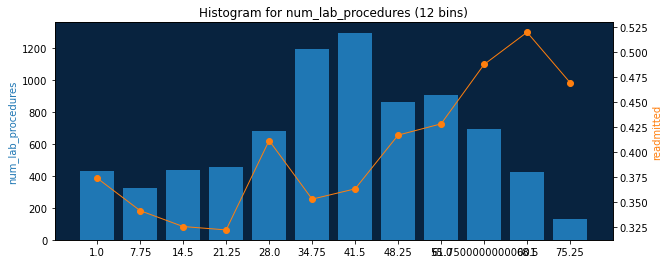

In [21]:
feature_name = "num_lab_procedures"
target_feature_name = "readmitted"

draw_feature_histogram("num_lab_procedures", 12)

Categorical and other feature types are supported as well:

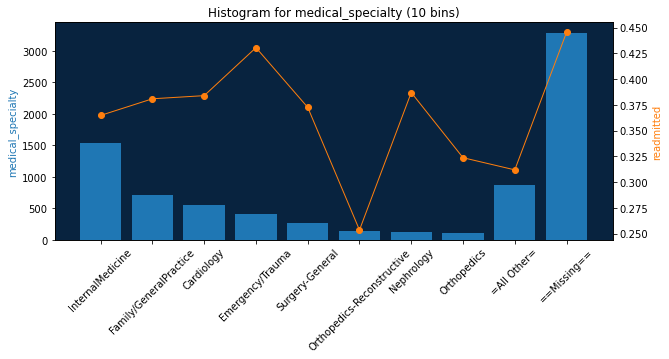

In [22]:
feature_name = "medical_specialty"

draw_feature_histogram("medical_specialty", 10)

### Lift Chart

A [lift chart](https://docs.datarobot.com/en/docs/modeling/analyze-models/evaluate/lift-chart.html#lift-chart) shows you how close model predictions are to the actual values of the target in the training data. The lift chart data includes the average predicted value and the average actual values of the target, sorted by the prediction values in ascending order and split into up to 60 bins.

In [23]:
lc = model.get_lift_chart("validation")
lc

LiftChart(validation)

In [24]:
bins_df = pd.DataFrame(lc.bins)
bins_df.head()

actual  predicted  bin_weight
0  0.000000   0.076155        27.0
1  0.148148   0.117283        27.0
2  0.076923   0.146873        26.0
3  0.148148   0.168664        27.0
4  0.111111   0.182873        27.0

The following snippet defines functions for rebinning and plotting.

In [25]:
def rebin_df(raw_df, number_of_bins):
    cols = ["bin", "actual_mean", "predicted_mean", "bin_weight"]
    new_df = pd.DataFrame(columns=cols)
    current_prediction_total = 0
    current_actual_total = 0
    current_row_total = 0
    x_index = 1
    bin_size = 60 / number_of_bins
    for rowId, data in raw_df.iterrows():
        current_prediction_total += data["predicted"] * data["bin_weight"]
        current_actual_total += data["actual"] * data["bin_weight"]
        current_row_total += data["bin_weight"]

        if (rowId + 1) % bin_size == 0:
            x_index += 1
            bin_properties = {
                "bin": ((round(rowId + 1) / 60) * number_of_bins),
                "actual_mean": current_actual_total / current_row_total,
                "predicted_mean": current_prediction_total / current_row_total,
                "bin_weight": current_row_total,
            }

            new_df = new_df.append(bin_properties, ignore_index=True)
            current_prediction_total = 0
            current_actual_total = 0
            current_row_total = 0
    return new_df


def matplotlib_lift(bins_df, bin_count, ax):
    grouped = rebin_df(bins_df, bin_count)
    ax.plot(range(1, len(grouped) + 1), grouped["predicted_mean"], marker="+", lw=1, color=dr_blue)
    ax.plot(range(1, len(grouped) + 1), grouped["actual_mean"], marker="*", lw=1, color=dr_orange)
    ax.set_xlim([0, len(grouped) + 1])
    ax.set_facecolor(dr_dark_blue)
    ax.legend(loc="best")
    ax.set_title("Lift chart {} bins".format(bin_count))
    ax.set_xlabel("Sorted Prediction")
    ax.set_ylabel("Value")
    return grouped

Note that while this method works for any bin count less then 60, the most reliable result can be achieved when the number of bins is a divisor of 60.
 
Additionally, this visualization method does not work for a bin count greater than 60 because DataRobot does not provide enough information for a larger resolution.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


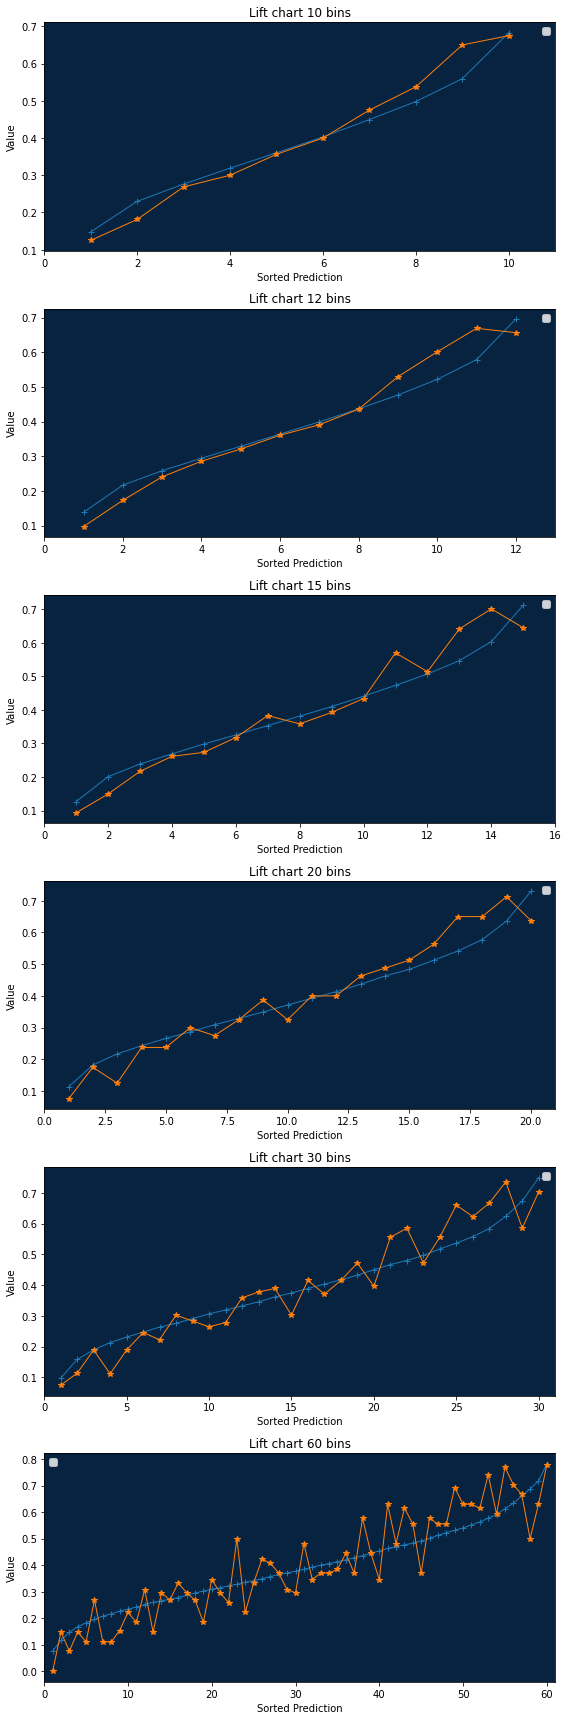

In [26]:
bin_counts = [10, 12, 15, 20, 30, 60]
f, axarr = plt.subplots(len(bin_counts))
f.set_size_inches((8, 4 * len(bin_counts)))

rebinned_dfs = []
for i in range(len(bin_counts)):
    rebinned_dfs.append(matplotlib_lift(bins_df, bin_counts[i], axarr[i]))
plt.tight_layout()

### Rebinned Data

You can retrieve raw re-binned data for use in third-party tools or for additional evaluation

In [21]:
for rebinned in rebinned_dfs:
    print("Number of bins: {}".format(len(rebinned.index)))
    print(rebinned)

Number of bins: 10
    bin  actual_mean  predicted_mean  bin_weight
0   1.0      0.13750        0.159916       160.0
1   2.0      0.17500        0.233332       160.0
2   3.0      0.27500        0.276564       160.0
3   4.0      0.28750        0.317841       160.0
4   5.0      0.41250        0.355449       160.0
5   6.0      0.33750        0.394435       160.0
6   7.0      0.49375        0.436481       160.0
7   8.0      0.54375        0.490176       160.0
8   9.0      0.62500        0.559797       160.0
9  10.0      0.68125        0.697142       160.0
Number of bins: 12
     bin  actual_mean  predicted_mean  bin_weight
0    1.0     0.134328        0.151886       134.0
1    2.0     0.180451        0.220872       133.0
2    3.0     0.210526        0.259316       133.0
3    4.0     0.313433        0.294237       134.0
4    5.0     0.293233        0.327699       133.0
5    6.0     0.413534        0.358398       133.0
6    7.0     0.353383        0.390993       133.0
7    8.0     0.440299  

### ROC Curve

The receiver operating characteristic curve, or [ROC curve](https://docs.datarobot.com/en/docs/modeling/analyze-models/evaluate/roc-curve-tab/roc-curve.html#roc-curve), is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [27]:
roc = model.get_roc_curve("validation")
roc

RocCurve(validation)

In [28]:
df = pd.DataFrame(roc.roc_points)
df.head()

accuracy  f1_score  false_negative_score  true_negative_score  \
0  0.603125  0.000000                   635                  965   
1  0.603750  0.003145                   634                  965   
2  0.605625  0.012520                   631                  965   
3  0.606875  0.021773                   628                  964   
4  0.608125  0.036866                   623                  961   

   true_positive_score  false_positive_score  true_negative_rate  \
0                    0                     0            1.000000   
1                    1                     0            1.000000   
2                    4                     0            1.000000   
3                    7                     1            0.998964   
4                   12                     4            0.995855   

   false_positive_rate  true_positive_rate  matthews_correlation_coefficient  \
0             0.000000            0.000000                          0.000000   
1             0.000000            0.001575                          0.030829   
2             0.000000            0.006299                          0.061715   
3             0.001036            0.011024                          0.069276   
4             0.004145            0.018898                          0.072540   

   positive_predictive_value  negative_predictive_value  threshold  \
0                      0.000                   0.603125   1.000000   
1                      1.000                   0.603502   0.878030   
2                      1.000                   0.604637   0.849079   
3                      0.875                   0.605528   0.788308   
4                      0.750                   0.606692   0.764327   

   fraction_predicted_as_positive  fraction_predicted_as_negative  \
0                        0.000000                        1.000000   
1                        0.000625                        0.999375   
2                        0.002500                        0.997500   
3                        0.005000                        0.995000   
4                        0.010000                        0.990000   

   lift_positive  lift_negative  
0       0.000000       1.000000  
1       2.519685       1.000625  
2       2.519685       1.002506  
3       2.204724       1.003984  
4       1.889764       1.005914

#### Threshold operations

You can get the recommended threshold value with a maximal F1 score using the `RocCurve.get_best_f1_threshold` method. That is the same threshold that is preselected in the DataRobot application when you open the **ROC curve** tab.

In [29]:
threshold = roc.get_best_f1_threshold()
threshold

0.3204921984454553

To estimate metrics for different threshold values, pass it to the `RocCurve.estimate_threshold` method. This produces the same results as updating the threshold in the **ROC Curve** tab.

In [30]:
metrics = roc.estimate_threshold(threshold)
metrics

{'accuracy': 0.606875,
 'f1_score': 0.6231276213301378,
 'false_negative_score': 115,
 'true_negative_score': 451,
 'true_positive_score': 520,
 'false_positive_score': 514,
 'true_negative_rate': 0.46735751295336786,
 'false_positive_rate': 0.5326424870466321,
 'true_positive_rate': 0.8188976377952756,
 'matthews_correlation_coefficient': 0.2929107725430276,
 'positive_predictive_value': 0.5029013539651838,
 'negative_predictive_value': 0.7968197879858657,
 'threshold': 0.3204921984454553,
 'fraction_predicted_as_positive': 0.64625,
 'fraction_predicted_as_negative': 0.35375,
 'lift_positive': 1.2671530178650299,
 'lift_negative': 1.3211519800801919}

Use the following snippet to plot the ROC curve.

(0.0, 1.0)

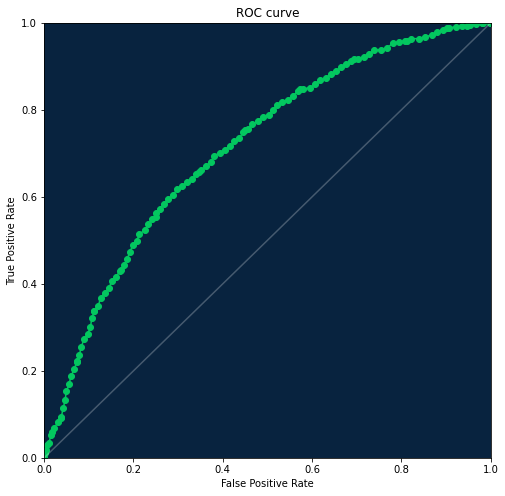

In [32]:
roc_df = df
dr_roc_green = "#03c75f"
white = "#ffffff"
dr_purple = "#65147D"
dr_dense_green = "#018f4f"

threshold = roc.get_best_f1_threshold()
fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.xlim([0, 1])
plt.ylabel("True Positive Rate")
plt.ylim([0, 1])

### Confusion matrix

Using keys from the retrieved metrics, you can build a confusion matrix for the selected threshold.

In [26]:
roc_df = pd.DataFrame(
    {
        "Predicted Negative": [
            metrics["true_negative_score"],
            metrics["false_negative_score"],
            metrics["true_negative_score"] + metrics["false_negative_score"],
        ],
        "Predicted Positive": [
            metrics["false_positive_score"],
            metrics["true_positive_score"],
            metrics["true_positive_score"] + metrics["false_positive_score"],
        ],
        "Total": [
            len(roc.negative_class_predictions),
            len(roc.positive_class_predictions),
            len(roc.negative_class_predictions) + len(roc.positive_class_predictions),
        ],
    }
)
roc_df.index = pd.MultiIndex.from_tuples([("Actual", "-"), ("Actual", "+"), ("Total", "")])
roc_df.columns = pd.MultiIndex.from_tuples([("Predicted", "-"), ("Predicted", "+"), ("Total", "")])
roc_df.style.set_properties(**{"text-align": "right"})
roc_df

Predicted      Total
                 -    +      
Actual -       511  454   962
       +       144  491   638
Total          655  945  1600

### Prediction distribution plot

You can use various methods to plot prediction distribution. The method used depends on what packages you have installed. Three different visualizations are outlined below.

#### Seaborn

Text(0,0.5,'Probability Density')

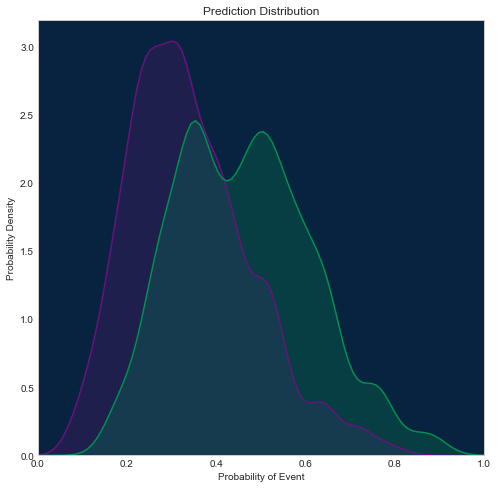

In [28]:
import seaborn as sns

sns.set_style("whitegrid", {"axes.grid": False})

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

shared_params = {"shade": True, "clip": (0, 1), "bw": 0.2}
sns.kdeplot(np.array(roc.negative_class_predictions), color=dr_purple, **shared_params)
sns.kdeplot(np.array(roc.positive_class_predictions), color=dr_dense_green, **shared_params)

plt.title("Prediction Distribution")
plt.xlabel("Probability of Event")
plt.xlim([0, 1])
plt.ylabel("Probability Density")

#### SciPy

Text(0,0.5,'Probability Density')

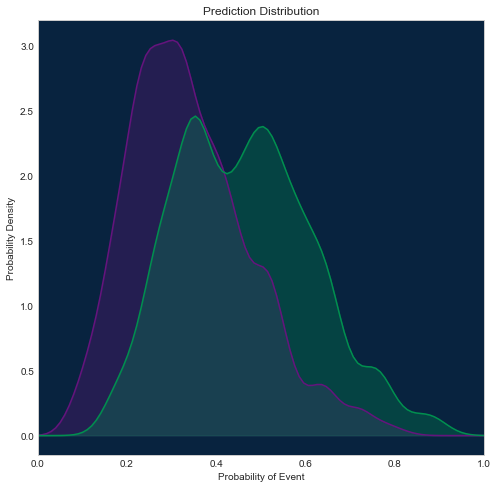

In [29]:
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)
xs = np.linspace(0, 1, 100)

density_neg = gaussian_kde(roc.negative_class_predictions, bw_method=0.2)
plt.plot(xs, density_neg(xs), color=dr_purple)
plt.fill_between(xs, 0, density_neg(xs), color=dr_purple, alpha=0.3)

density_pos = gaussian_kde(roc.positive_class_predictions, bw_method=0.2)
plt.plot(xs, density_pos(xs), color=dr_dense_green)
plt.fill_between(xs, 0, density_pos(xs), color=dr_dense_green, alpha=0.3)

plt.title("Prediction Distribution")
plt.xlabel("Probability of Event")
plt.xlim([0, 1])
plt.ylabel("Probability Density")

#### Scikit-learn

The scikit-learn method is most consistent with how DataRobot displays this plot in the application. This is because scikit-learn supports additional kernel options and you can configure the same kernel used in the application (an epanichkov kernel with size 0.05).

The other examples above use a gaussian kernel, so they may slightly differ from the plot in the DataRobot application.

Text(0,0.5,'Probability Density')

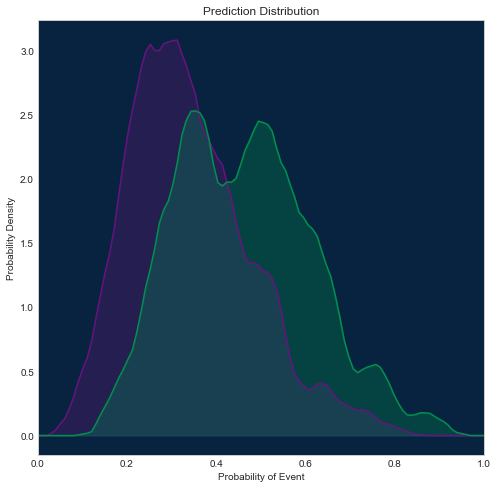

In [30]:
from sklearn.neighbors import KernelDensity

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)
xs = np.linspace(0, 1, 100)

X_neg = np.asarray(roc.negative_class_predictions)[:, np.newaxis]
density_neg = KernelDensity(bandwidth=0.05, kernel="epanechnikov").fit(X_neg)
plt.plot(xs, np.exp(density_neg.score_samples(xs[:, np.newaxis])), color=dr_purple)
plt.fill_between(
    xs, 0, np.exp(density_neg.score_samples(xs[:, np.newaxis])), color=dr_purple, alpha=0.3
)

X_pos = np.asarray(roc.positive_class_predictions)[:, np.newaxis]
density_pos = KernelDensity(bandwidth=0.05, kernel="epanechnikov").fit(X_pos)
plt.plot(xs, np.exp(density_pos.score_samples(xs[:, np.newaxis])), color=dr_dense_green)
plt.fill_between(
    xs, 0, np.exp(density_pos.score_samples(xs[:, np.newaxis])), color=dr_dense_green, alpha=0.3
)

plt.title("Prediction Distribution")
plt.xlabel("Probability of Event")
plt.xlim([0, 1])
plt.ylabel("Probability Density")

### Word Cloud

Text variables often contain words that are highly indicative of the response. The [Word Cloud](https://docs.datarobot.com/en/docs/modeling/analyze-models/understand/word-cloud.html) insight displays the most relevant words and short phrases in word cloud format.

This example shows you how to obtain word cloud data and visualize it in similar to how the insight is displayed in the DataRobot application. The example uses `colour` and `wordcloud` packages.

First, create a color palette similar to DataRobot's style.

In [ ]:
from colour import Color
import wordcloud

In [32]:
colors = [Color("#2458EB")]
colors.extend(list(Color("#2458EB").range_to(Color("#31E7FE"), 81))[1:])
colors.extend(list(Color("#31E7FE").range_to(Color("#8da0a2"), 21))[1:])
colors.extend(list(Color("#a18f8c").range_to(Color("#ffad9e"), 21))[1:])
colors.extend(list(Color("#ffad9e").range_to(Color("#d80909"), 81))[1:])
webcolors = [c.get_web() for c in colors]

The variable `webcolors` now contains 201 ([-1, 1] interval with step 0.01) colors that will be used in the word cloud. Next, configure the palette.

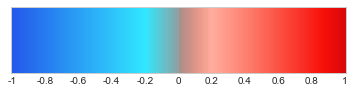

In [33]:
from matplotlib.colors import LinearSegmentedColormap

dr_cmap = LinearSegmentedColormap.from_list("DataRobot", webcolors, N=len(colors))
x = np.arange(-1, 1.01, 0.01)
y = np.arange(0, 40, 1)
X = np.meshgrid(x, y)[0]
plt.xticks(
    [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    ["-1", "-0.8", "-0.6", "-0.4", "-0.2", "0", "0.2", "0.4", "0.6", "0.8", "1"],
)
plt.yticks([], [])
im = plt.imshow(X, interpolation="nearest", origin="lower", cmap=dr_cmap)

Now you can pick a model that provides a word cloud in the DataRobot. Any "Auto-Tuned Word N-Gram Text Modeler" model will work.

In [34]:
models = project.get_models()

In [35]:
model_with_word_cloud = None
for model in models:
    try:
        model.get_word_cloud()
        model_with_word_cloud = model
        break
    except ClientError as e:
        if e.json["message"] and "No word cloud data" in e.json["message"]:
            pass
        else:
            raise

model_with_word_cloud

Model(u'Auto-Tuned Word N-Gram Text Modeler using token occurrences - diag_1_desc')

In [36]:
wc = model_with_word_cloud.get_word_cloud(exclude_stop_words=True)

In [37]:
def word_cloud_plot(wc, font_path=None):
    # Stopwords usually dominate any word cloud, so we will filter them out
    dict_freq = {
        wc_word["ngram"]: wc_word["frequency"]
        for wc_word in wc.ngrams
        if not wc_word["is_stopword"]
    }
    dict_coef = {wc_word["ngram"]: wc_word["coefficient"] for wc_word in wc.ngrams}

    def color_func(*args, **kwargs):
        word = args[0]
        palette_index = int(round(dict_coef[word] * 100)) + 100
        r, g, b = colors[palette_index].get_rgb()
        return "rgb({:.0f}, {:.0f}, {:.0f})".format(int(r * 255), int(g * 255), int(b * 255))

    wc_image = wordcloud.WordCloud(
        stopwords=set(),
        width=1024,
        height=1024,
        relative_scaling=0.5,
        prefer_horizontal=1,
        color_func=color_func,
        background_color=(0, 10, 29),
        font_path=font_path,
    ).fit_words(dict_freq)
    plt.imshow(wc_image, interpolation="bilinear")
    plt.axis("off")

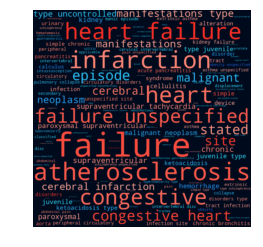

In [38]:
word_cloud_plot(wc)

You can use the word cloud to get information about the most frequent and most important (highest absolute coefficient value) ngrams in your text.

In [39]:
wc.most_frequent(5)

[{'coefficient': 0.6229774184805059,
  'count': 534,
  'frequency': 0.21876280213027446,
  'is_stopword': False,
  'ngram': u'failure'},
 {'coefficient': 0.5680375262833832,
  'count': 524,
  'frequency': 0.21466612044244163,
  'is_stopword': False,
  'ngram': u'atherosclerosis'},
 {'coefficient': 0.37932405511744804,
  'count': 505,
  'frequency': 0.2068824252355592,
  'is_stopword': False,
  'ngram': u'infarction'},
 {'coefficient': 0.4689734305695615,
  'count': 453,
  'frequency': 0.18557968045882836,
  'is_stopword': False,
  'ngram': u'heart'},
 {'coefficient': 0.7444542252245913,
  'count': 452,
  'frequency': 0.18517001229004507,
  'is_stopword': False,
  'ngram': u'heart failure'}]

In [40]:
wc.most_important(5)

[{'coefficient': -0.875917913896919,
  'count': 38,
  'frequency': 0.015567390413764851,
  'is_stopword': False,
  'ngram': u'obesity unspecified'},
 {'coefficient': -0.8655105382141891,
  'count': 38,
  'frequency': 0.015567390413764851,
  'is_stopword': False,
  'ngram': u'obesity'},
 {'coefficient': 0.8329465952065771,
  'count': 9,
  'frequency': 0.0036870135190495697,
  'is_stopword': False,
  'ngram': u'nephroptosis'},
 {'coefficient': 0.7444542252245913,
  'count': 452,
  'frequency': 0.18517001229004507,
  'is_stopword': False,
  'ngram': u'heart failure'},
 {'coefficient': 0.7029270716899754,
  'count': 76,
  'frequency': 0.031134780827529702,
  'is_stopword': False,
  'ngram': u'disorders'}]

#### Non-ASCII texts

The word cloud has full Unicode support, but if you want to visualize it using the code from this notebook you should use the `font_path` parameter that leads to font supporting symbols used in your text. For example, for Japanese text in the model below you should use one of the [CJK fonts](https://en.wikipedia.org/wiki/List_of_CJK_fonts). If you do not have a compatible font, you can download an open-source font [like this one](https://github.com/googlei18n/noto-cjk/raw/master/NotoSansCJKjp-Regular.otf) from [Google's Noto project](https://www.google.com/get/noto/).

For this section, download the Japanese-translation version of the "10k_diabetes.csv" dataset [here](jp_10k.csv).

In [41]:
jp_project = dr.Project.create("jp_10k.csv", project_name="Japanese 10K")

print("Project ID: {}".format(project.id))

Project ID: 5c0008e06523cd0233c49fe4


In [42]:
jp_project.set_target("readmitted_再入院", mode=AUTOPILOT_MODE.QUICK)
jp_project.wait_for_autopilot()

In progress: 2, queued: 12 (waited: 0s)
In progress: 2, queued: 12 (waited: 1s)
In progress: 2, queued: 12 (waited: 1s)
In progress: 2, queued: 12 (waited: 2s)
In progress: 2, queued: 12 (waited: 4s)
In progress: 2, queued: 12 (waited: 6s)
In progress: 2, queued: 11 (waited: 9s)
In progress: 1, queued: 11 (waited: 16s)
In progress: 2, queued: 9 (waited: 30s)
In progress: 2, queued: 7 (waited: 50s)
In progress: 2, queued: 5 (waited: 70s)
In progress: 2, queued: 3 (waited: 91s)
In progress: 2, queued: 1 (waited: 111s)
In progress: 1, queued: 0 (waited: 132s)
In progress: 2, queued: 5 (waited: 152s)
In progress: 2, queued: 3 (waited: 172s)
In progress: 2, queued: 2 (waited: 193s)
In progress: 2, queued: 1 (waited: 213s)
In progress: 1, queued: 0 (waited: 234s)
In progress: 2, queued: 14 (waited: 254s)
In progress: 2, queued: 14 (waited: 274s)
In progress: 2, queued: 12 (waited: 295s)
In progress: 1, queued: 12 (waited: 316s)
In progress: 2, queued: 10 (waited: 336s)
In progress: 2, queued

In [43]:
jp_models = jp_project.get_models()
jp_model_with_word_cloud = None

for model in jp_models:
    try:
        model.get_word_cloud()
        jp_model_with_word_cloud = model
        break
    except ClientError as e:
        if e.json["message"] and "No word cloud data" in e.json["message"]:
            pass
        else:
            raise

jp_model_with_word_cloud

Model(u'Auto-Tuned Word N-Gram Text Modeler using token occurrences and tfidf - diag_1_desc_\u8a3a\u65ad1\u8aac\u660e')

In [44]:
jp_wc = jp_model_with_word_cloud.get_word_cloud(exclude_stop_words=True)

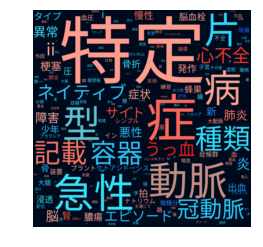

In [45]:
word_cloud_plot(jp_wc, font_path="NotoSansCJKjp-Regular.otf")

### Cumulative gains and lift

ROC curve data also contains information necessary for creating cumulative gains and lift charts. Use the fields `fraction_predicted_as_positive` and `fraction_predicted_as_negative` to get X axis and set:

* Use `true_positive_rate`/`true_negative_rate` as the Y axis for cumulative gains
* Use `lift_positive`/`lift_negative` as the Y axis for lift.

You can use the code for visualizations below, along with baseline/random model (in gray) and ideal (in orange).

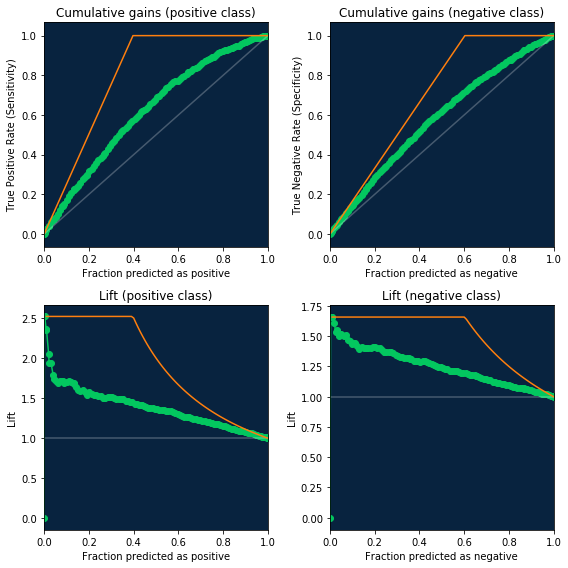

In [46]:
fig, ((ax_gains_pos, ax_gains_neg), (ax_lift_pos, ax_lift_neg)) = plt.subplots(
    nrows=2, ncols=2, figsize=(8, 8)
)
total_rows = (
    df.true_positive_score[0]
    + df.false_negative_score[0]
    + df.true_negative_score[0]
    + df.false_positive_score[0]
)
fraction_of_positives = float(df.true_positive_score[0] + df.false_negative_score[0]) / total_rows
fraction_of_negatives = 1 - fraction_of_positives

# Cumulative gains (positive class)
ax_gains_pos.set_facecolor(dr_dark_blue)
ax_gains_pos.scatter(df.fraction_predicted_as_positive, df.true_positive_rate, color=dr_roc_green)
ax_gains_pos.plot(df.fraction_predicted_as_positive, df.true_positive_rate, color=dr_roc_green)
ax_gains_pos.plot([0, 1], [0, 1], color=white, alpha=0.25)
ax_gains_pos.plot([0, fraction_of_positives, 1], [0, 1, 1], color=dr_orange)
ax_gains_pos.set_title("Cumulative gains (positive class)")
ax_gains_pos.set_xlabel("Fraction predicted as positive")
ax_gains_pos.set_xlim([0, 1])
ax_gains_pos.set_ylabel("True Positive Rate (Sensitivity)")

# Cumulative gains (negative class)
ax_gains_neg.set_facecolor(dr_dark_blue)
ax_gains_neg.scatter(df.fraction_predicted_as_negative, df.true_negative_rate, color=dr_roc_green)
ax_gains_neg.plot(df.fraction_predicted_as_negative, df.true_negative_rate, color=dr_roc_green)
ax_gains_neg.plot([0, 1], [0, 1], color=white, alpha=0.25)
ax_gains_neg.plot([0, fraction_of_negatives, 1], [0, 1, 1], color=dr_orange)
ax_gains_neg.set_title("Cumulative gains (negative class)")
ax_gains_neg.set_xlabel("Fraction predicted as negative")
ax_gains_neg.set_xlim([0, 1])
ax_gains_neg.set_ylabel("True Negative Rate (Specificity)")

# Lift (positive class)
ax_lift_pos.set_facecolor(dr_dark_blue)
ax_lift_pos.scatter(df.fraction_predicted_as_positive, df.lift_positive, color=dr_roc_green)
ax_lift_pos.plot(df.fraction_predicted_as_positive, df.lift_positive, color=dr_roc_green)
ax_lift_pos.plot([0, 1], [1, 1], color=white, alpha=0.25)
ax_lift_pos.set_title("Lift (positive class)")
ax_lift_pos.set_xlabel("Fraction predicted as positive")
ax_lift_pos.set_xlim([0, 1])
ax_lift_pos.set_ylabel("Lift")
ideal_lift_pos_x = np.arange(0.01, 1.01, 0.01)
ideal_lift_pos_y = np.minimum(1 / fraction_of_positives, 1 / ideal_lift_pos_x)
ax_lift_pos.plot(ideal_lift_pos_x, ideal_lift_pos_y, color=dr_orange)

# Lift (negative class)
ax_lift_neg.set_facecolor(dr_dark_blue)
ax_lift_neg.scatter(df.fraction_predicted_as_negative, df.lift_negative, color=dr_roc_green)
ax_lift_neg.plot(df.fraction_predicted_as_negative, df.lift_negative, color=dr_roc_green)
ax_lift_neg.plot([0, 1], [1, 1], color=white, alpha=0.25)
# ax_lift_neg.plot([0, fraction_of_positives, 1], [0, 1, 1], color=dr_orange)
ax_lift_neg.set_title("Lift (negative class)")
ax_lift_neg.set_xlabel("Fraction predicted as negative")
ax_lift_neg.set_xlim([0, 1])
ax_lift_neg.set_ylabel("Lift")
ideal_lift_neg_x = np.arange(0.01, 1.01, 0.01)
ideal_lift_neg_y = np.minimum(1 / fraction_of_negatives, 1 / ideal_lift_neg_x)
ax_lift_neg.plot(ideal_lift_neg_x, ideal_lift_neg_y, color=dr_orange)

# Adjust spacing for notebook
plt.tight_layout()